In [208]:
import pandas as pd

In [271]:
folder_original_results = 'original/'
folder_replicated_results = 'replicated_randomfold/'
std = 'StandardTestTrain_Summary.csv'
amine = 'LeaveOneOut_Summary.csv'
experiment_types = ['knn_norm0', 'knn_norm1']
#experiment_types = ['knn', 'knn1', 'knn_norm0', 'knn_norm1', 'knn_norm2', 'knn_std0', 'knn_std1','knn_std2']

In [272]:
def rename_column_according_to_paper(data_index):
    transform_data_index = {
    'data0.raw1': 'solV-chem',
    'data1.raw1': 'solUD-chem',
    'data0.raw2': 'solV-exp',
    'data1.raw2': 'solUD-exp',
    'data0.raw3': 'solUD-reag',
    'data1.raw3': 'solUD-reag',
    'data1.pM': 'solUD-prop',
    'data0': 'solV',
    'data1': 'solUD',
    'noConc.raw1': 'chem',
    'noConc.raw2': 'exp',
    'noConc.raw3': 'chem',
    'noConc': 'feat-only'
    }
    return transform_data_index[data_index]

def prepare_original_data(original):
    original.rename(columns={"Unnamed: 0": 'type', "Unnamed: 1": 'data_index'}, inplace = True)
    val = 'all'
    original.query('type == @val', inplace = True)
    original['data_index'] = original['data_index'].apply(rename_column_according_to_paper)
    return original

In [273]:
import matplotlib.pyplot as plt

import numpy as np
plt.rcParams["figure.figsize"] = (14,8)

def plot_bar(data, title, data_to_plot):
    fig, ax = plt.subplots()
    MEAN = 0
    STD = 1
    MIN = 2
    MAX = 3
    ax.errorbar(np.arange(len(data)), data[data_to_plot[MEAN]], data[data_to_plot[STD]], fmt='ok',lw=2, ecolor='green')
    ax.errorbar(np.arange(len(data)), data[data_to_plot[MEAN]], data[data_to_plot[MEAN]] - data[data_to_plot[MIN]],data[data_to_plot[MAX]] - data[data_to_plot[MEAN]],fmt ='ok', ecolor='blue', lw=1)
    
    ax.set_xticks(np.arange(len(data)))
    ax.set_xticklabels(data['data_index'].values)
    plt.xticks(rotation=45)
    ax.set_ylim([0.0,0.9])
    plt.title(title)
    plt.grid()
    plt.savefig(full_plot_path+title+'.jpg', bbox_inches='tight')
    

In [274]:
precision_original = ['precision_success mean', 'precision_success std', 'precision_success min', 
           'precision_success max']
recall_original = [ x.replace('precision', 'recall') for x in precision_original]
f1_original = [ x.replace('precision', 'f1') for x in precision_original]
matt_original = [ x.replace('precision', 'matthewCoef') for x in precision_original]

precision_rep = [ x.replace('success', 'positive') for x in precision_original]
recall_rep = [ x.replace('precision', 'recall') for x in precision_rep]
f1_rep = [ x.replace('precision', 'f1') for x in precision_rep]
matt_rep = [ x.replace('precision_positive', 'matthewCoef') for x in precision_rep]


In [275]:
original = pd.read_csv(folder_original_results + experiment +'/' + std)
replicated = pd.read_csv(folder_replicated_results + experiment + '/' + std)
replicated

,data_index,precision_positive mean,recall_positive mean,f1_positive mean,matthewCoef mean,precision_positive std,recall_positive std,f1_positive std,matthewCoef std,precision_positive min,recall_positive min,f1_positive min,matthewCoef min,precision_positive max,recall_positive max,f1_positive max,matthewCoef max
0,solUD-prop,0.686536,0.658807,0.671556,0.567471,0.027952,0.039901,0.023471,0.032582,0.651961,0.603604,0.639618,0.522275,0.720588,0.703704,0.710327,0.621075
1,solUD-reag,0.692775,0.622932,0.655598,0.551935,0.015161,0.029725,0.017074,0.020259,0.666667,0.592593,0.641604,0.534451,0.707182,0.674877,0.686717,0.589636
2,solV-chem,0.689124,0.601743,0.641894,0.537240,0.037148,0.034705,0.028047,0.033910,0.646707,0.571429,0.606742,0.503217,0.755682,0.666667,0.683673,0.587956
3,solV-reag,0.683349,0.600687,0.639094,0.532396,0.011651,0.028556,0.018406,0.021389,0.662983,0.570136,0.618557,0.504690,0.692771,0.639640,0.665105,0.552369


In [276]:
from pathlib import Path

full_plot_path = folder_replicated_results + 'plots/'
Path(full_plot_path).mkdir(parents=True, exist_ok=True)

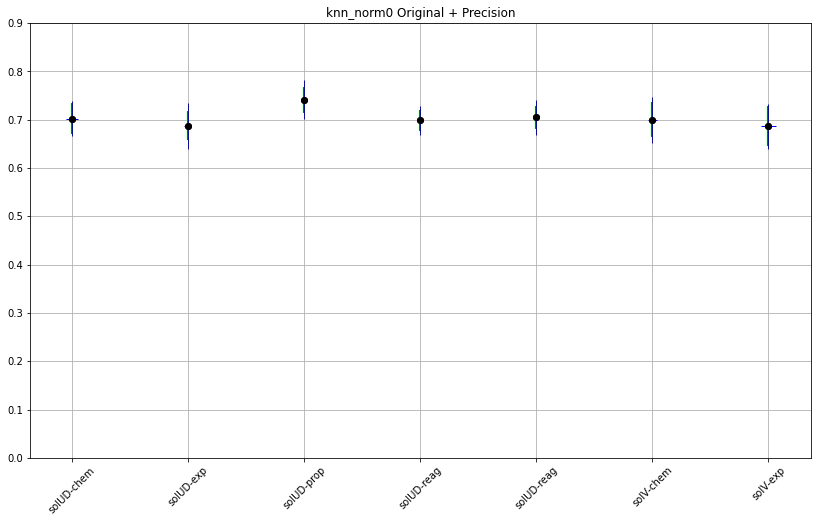

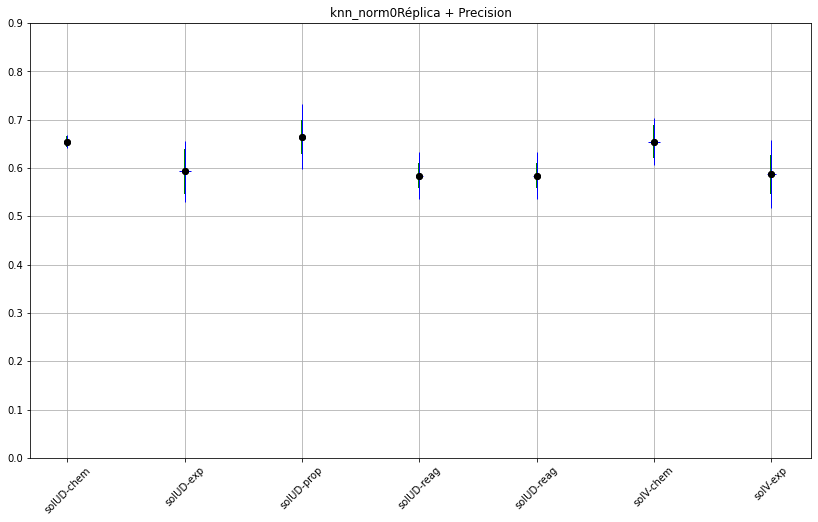

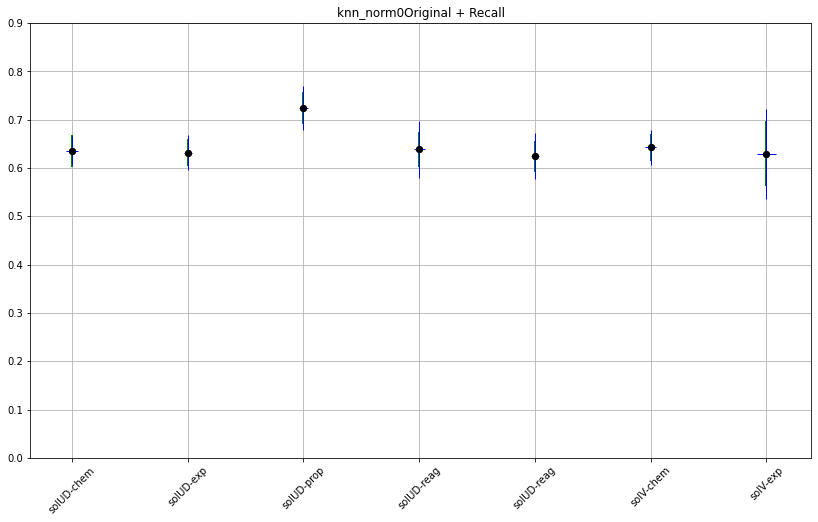

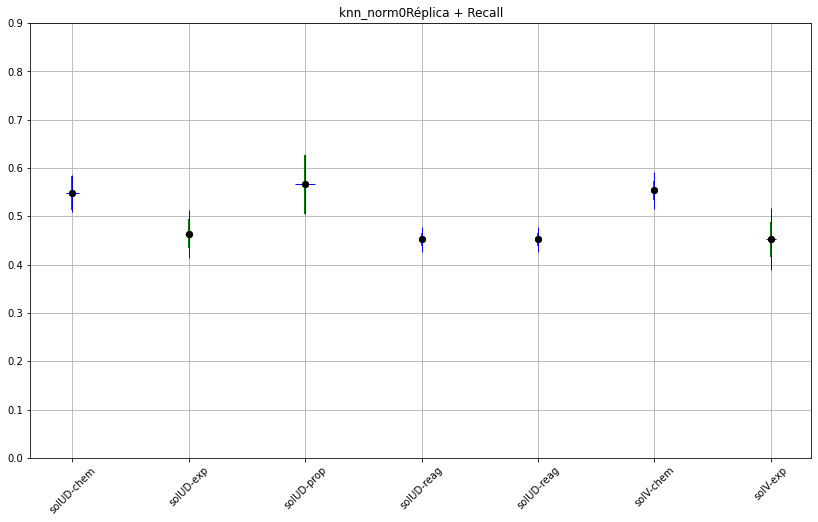

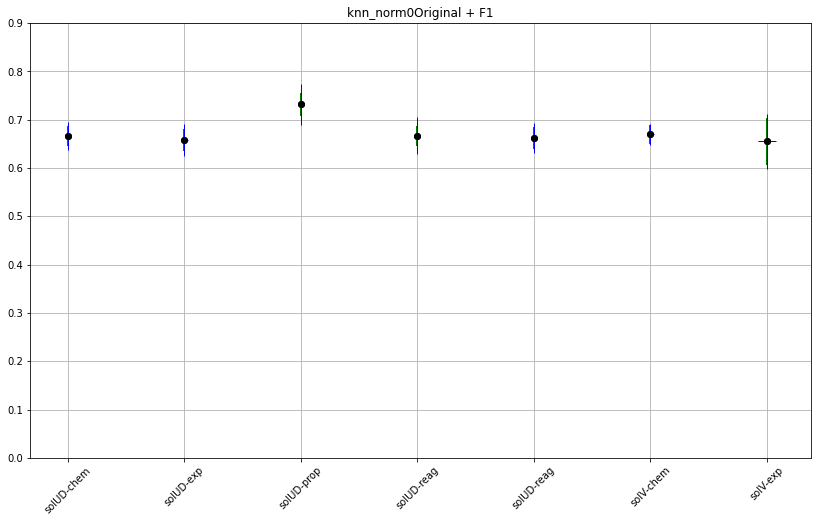

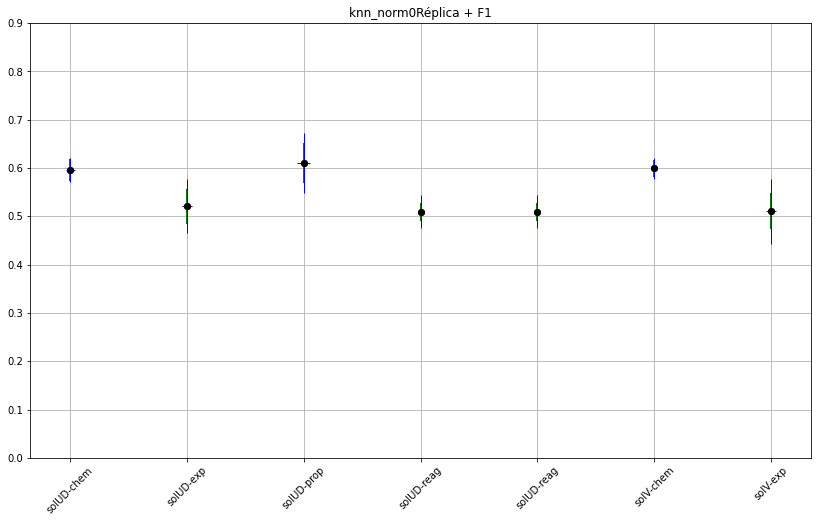

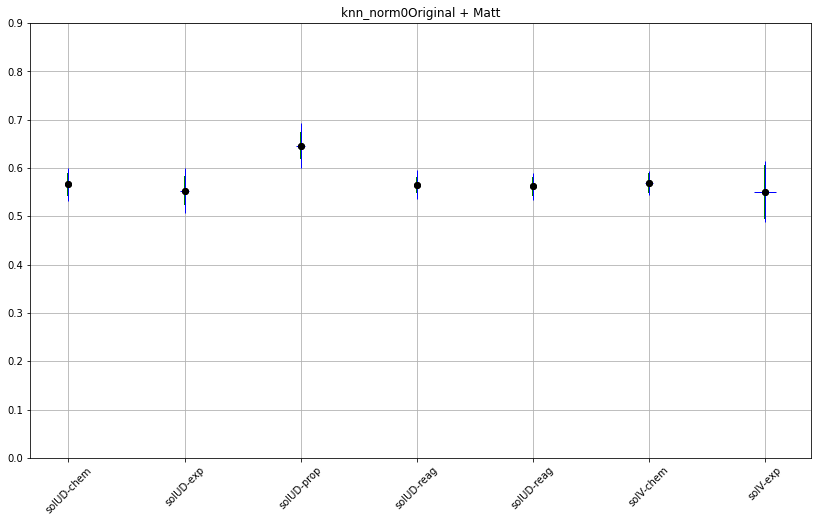

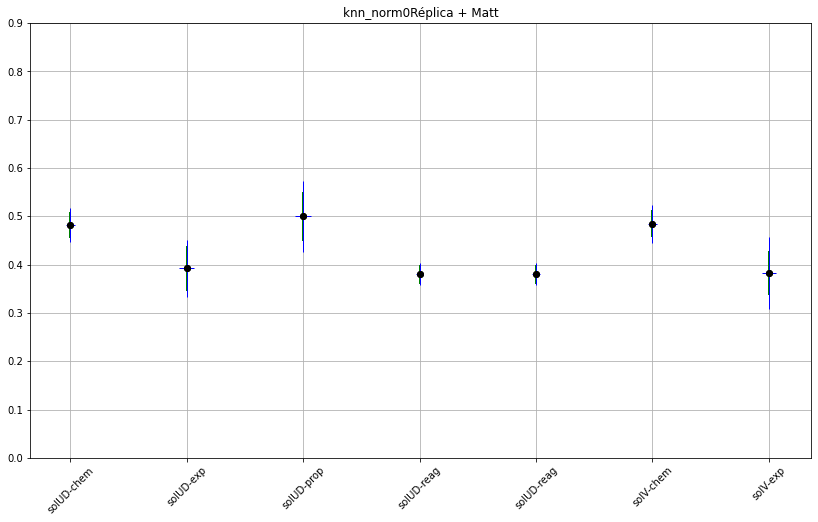

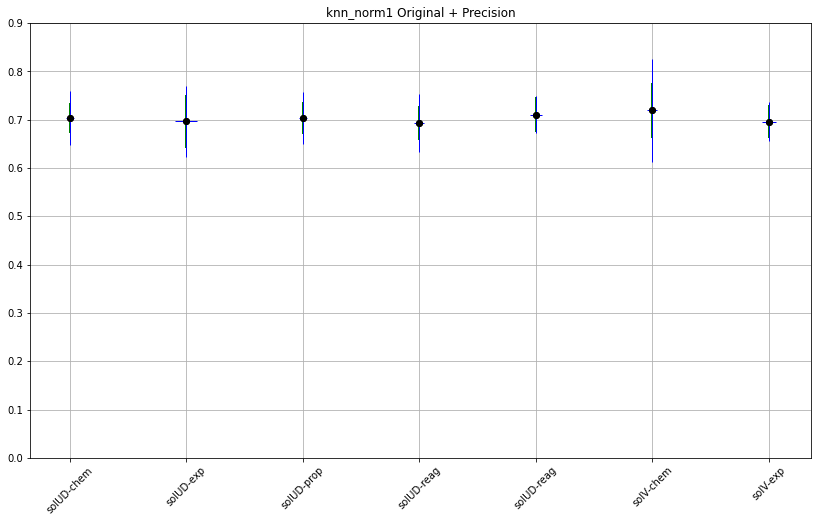

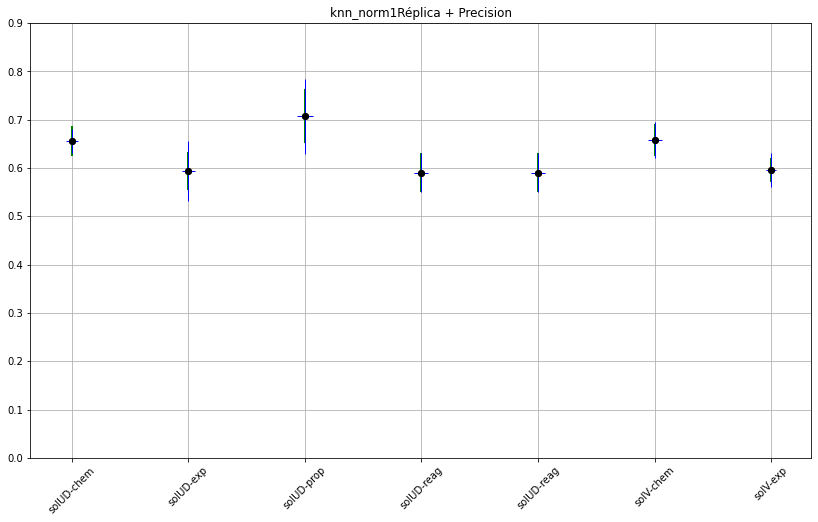

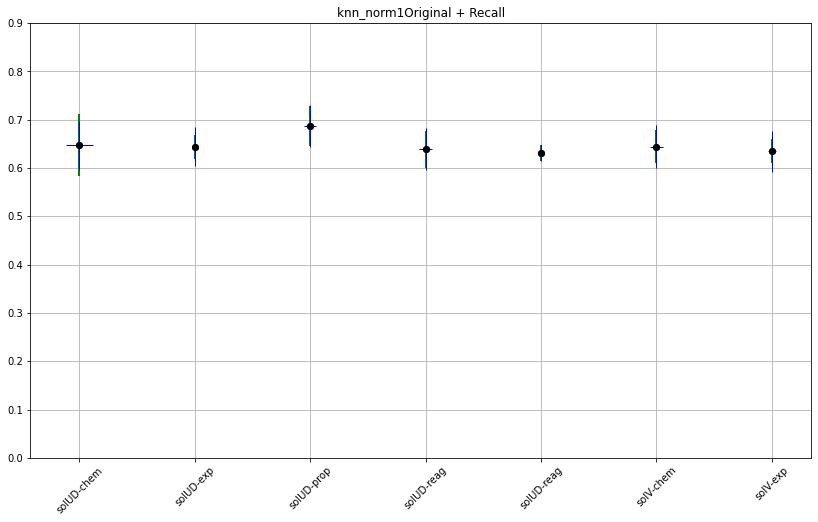

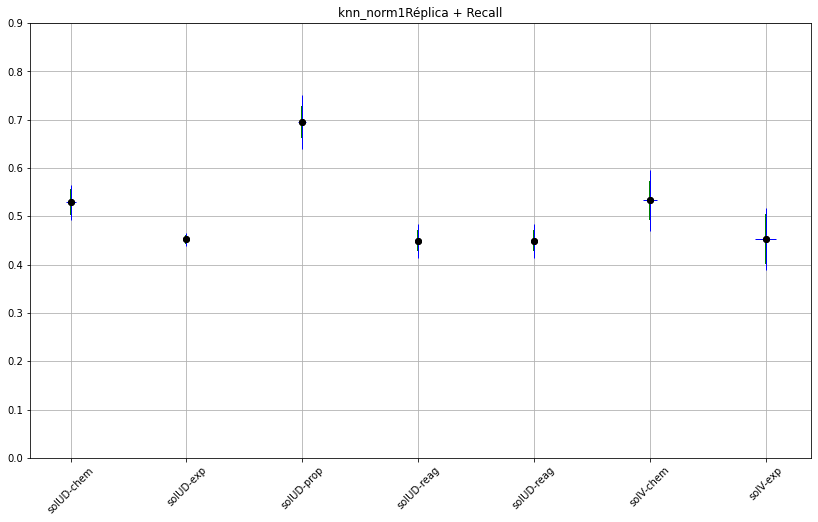

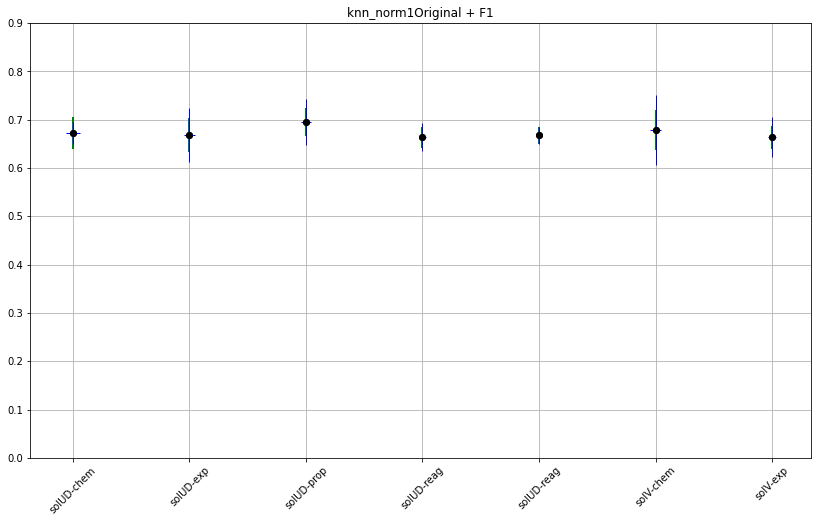

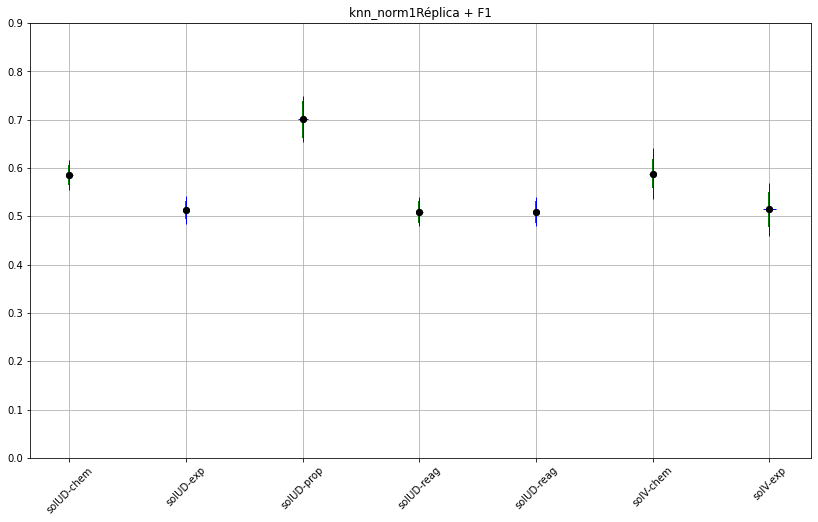

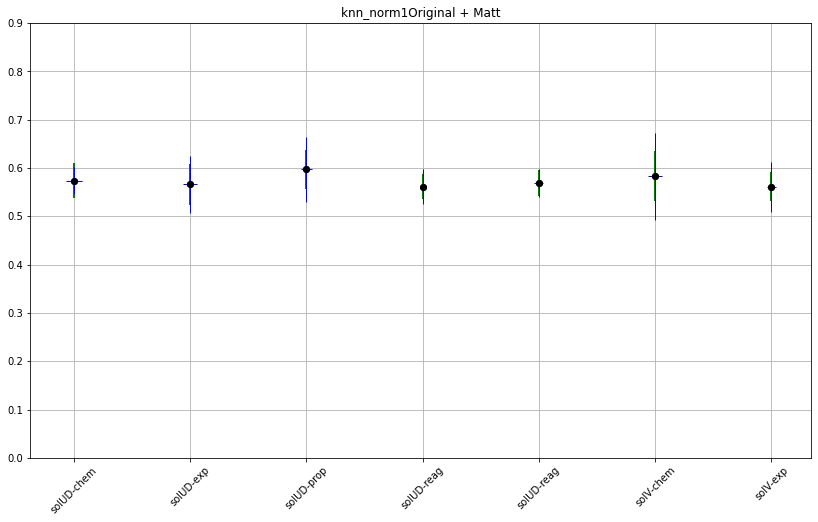

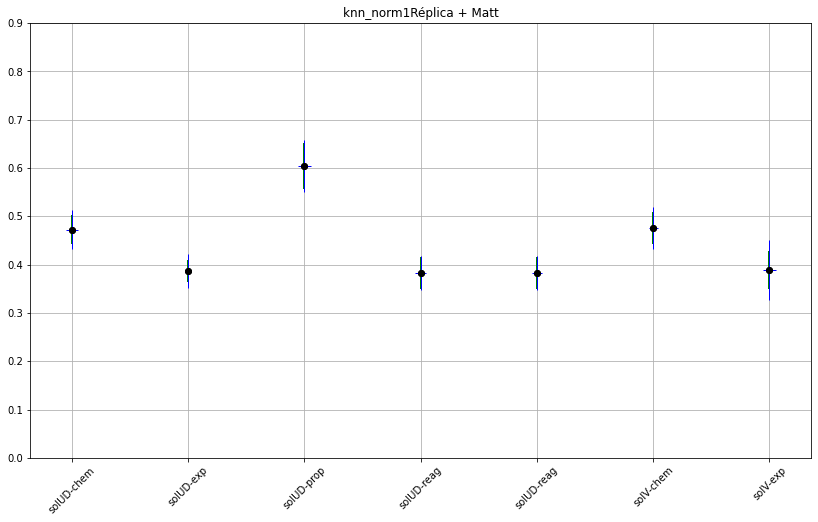

In [277]:
for experiment in experiment_types:
    original = pd.read_csv(folder_original_results + experiment +'/' + std)
    original = prepare_original_data(original)
    
    replicated = pd.read_csv(folder_replicated_results + experiment + '/' + std)

    merge = replicated.merge(original, how='inner', on='data_index')
    
    plot_bar(merge,experiment + ' Original + Precision', precision_original)     
    plot_bar(merge,experiment + 'Réplica + Precision', precision_rep)

    plot_bar(merge,experiment + 'Original + Recall', recall_original)     
    plot_bar(merge,experiment + 'Réplica + Recall', recall_rep)
    
    plot_bar(merge,experiment + 'Original + F1', f1_original)     
    plot_bar(merge,experiment + 'Réplica + F1', f1_rep)
    
    plot_bar(merge,experiment + 'Original + Matt', matt_original)     
    plot_bar(merge,experiment + 'Réplica + Matt', matt_rep)
    
   
    


In [192]:
reformed_dict = {}
for outerKey, innerDict in nested_dict.items():
    for innerKey, values in innerDict.items():
        reformed_dict[(outerKey,
                       innerKey)] = values
reformed_dict

NameError: name 'nested_dict' is not defined

In [193]:
multiIndex_df = pd.DataFrame(reformed_dict)
multiIndex_df

""


In [140]:
import numpy as np 
dictionary = {'A': {'a': {1: np.ones(5),
                          2: [2,3,4,5,6]},
                     'b': {1: [2,3,4,5,6],
                           2: [2,3,4,5,6]}},
               'B': {'a': {1: [2,3,4,5,6],
                           2: [2,3,4,5,6]},
                     'b': {1: [2,3,4,5,6],
                           2: [2,3,4,5,6]}}}

reform = {(level1_key, level2_key, level3_key): values
           for level1_key, level2_dict in dictionary.items()
           for level2_key, level3_dict in level2_dict.items()
           for level3_key, values      in level3_dict.items()}

In [117]:
importance_rename[0][0] = [1,2]
importance_rename[0][1] = [5,6]

In [141]:
pd.DataFrame(reform)

A           B         
     a     b     a     b   
     1  2  1  2  1  2  1  2
0  1.0  2  2  2  2  2  2  2
1  1.0  3  3  3  3  3  3  3
2  1.0  4  4  4  4  4  4  4
3  1.0  5  5  5  5  5  5  5
4  1.0  6  6  6  6  6  6  6

In [132]:
df = pd.DataFrame()
for i in importance_rename[0]:
    df.add(importance_rename[0][i])


KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([2], dtype='int64'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [197]:
results = pd.read_csv('orderFeatByImportintrpl_method_2_cv_2_norm_rxn_std_rxn_solV-exp_solUD-exp.csv',header=[0,1])

In [199]:
results.head()

solV-exp  \
                                          0   
0                                _feat_ASA-   
1  _raw_M_RQQRAHKHDFPBMC-UHFFFAOYSA-L_final   
2  _raw_M_FCTHQYIDLRRROX-UHFFFAOYSA-N_final   
3                     _raw_reagent_1_volume   
4                     _raw_reagent_2_volume   

                                             \
                                          1   
0                     _raw_reagent_1_volume   
1  _raw_M_FCTHQYIDLRRROX-UHFFFAOYSA-N_final   
2  _raw_M_RQQRAHKHDFPBMC-UHFFFAOYSA-L_final   
3                     _raw_reagent_0_volume   
4  _raw_M_ZEVRFFCPALTVDN-UHFFFAOYSA-N_final   

                                     solUD-exp  \
                                             0   
0                                   _feat_ASA-   
1                        _raw_reagent_1_volume   
2  _raw_v1-M_FCTHQYIDLRRROX-UHFFFAOYSA-N_final   
3                        _raw_reagent_2_volume   
4  _raw_v1-M_RQQRAHKHDFPBMC-UHFFFAOYSA-L_final   

                                                
                                             1  
0  _raw_v1-M_FCTHQYIDLRRROX-UHFFFAOYSA-N_final  
1  _raw_v1-M_RQQRAHKHDFPBMC-UHFFFAOYSA-L_final  
2                        _raw_reagent_1_volume  
3  _raw_v1-M_ZEVRFFCPALTVDN-UHFFFAOYSA-N_final  
4                                   _feat_ASA-

In [83]:
results.drop(['cv', 'support_negative', 'support_positive'], axis=1, inplace=True)

std = results.groupby('dataset_index').std().add_suffix('_std')
min_results = results.groupby('dataset_index').min().add_suffix('_min')
max_results = results.groupby('dataset_index').max().add_suffix('_max')
summary = results.groupby('dataset_index').mean().add_suffix('_mean')



In [84]:
summary = summary.join(std).join(min_results).join(max_results)


In [85]:
summary

,precision_positive_mean,recall_positive_mean,f1_positive_mean,matthewCoef_mean,precision_positive_std,recall_positive_std,f1_positive_std,matthewCoef_std,precision_positive_min,recall_positive_min,f1_positive_min,matthewCoef_min,precision_positive_max,recall_positive_max,f1_positive_max,matthewCoef_max
dataset_index,,,,,,,,,,,,,,,,
solV-chem,0.630677,0.552256,0.587631,0.466512,0.040925,0.035884,0.002555,0.001692,0.601739,0.526882,0.585824,0.465316,0.659615,0.577629,0.589438,0.467709


In [63]:
summary

Index(['solUD-reag', 'solV-chem'], dtype='object', name='dataset_index')

In [52]:
max

,Unnamed: 0_max,precision_positive_max,recall_positive_max,f1_positive_max,matthewCoef_max
dataset_index,,,,,
solUD-reag,3,0.577778,0.480801,0.499133,0.351485
solV-chem,1,0.569072,0.500835,0.510638,0.362443


In [65]:
summary = summary.join(std).join(min).join(max)

In [66]:
summary

,Unnamed: 0_mean,precision_positive_mean,recall_positive_mean,f1_positive_mean,support_negative_mean,support_positive_mean,matthewCoef_mean,Unnamed: 0_std,precision_positive_std,recall_positive_std,...,Unnamed: 0_min,precision_positive_min,recall_positive_min,f1_positive_min,matthewCoef_min,Unnamed: 0_max,precision_positive_max,recall_positive_max,f1_positive_max,matthewCoef_max
dataset_index,,,,,,,,,,,,,,,,,,,,,
solUD-reag,2.5,0.548348,0.440093,0.485716,1899.5,625.0,0.346018,0.707107,0.041619,0.057570,...,2,0.518919,0.399386,0.472298,0.340552,3,0.577778,0.480801,0.499133,0.351485
solV-chem,0.5,0.544953,0.462399,0.498277,1899.5,625.0,0.354654,0.707107,0.034110,0.054356,...,0,0.520833,0.423963,0.485915,0.346864,1,0.569072,0.500835,0.510638,0.362443
